#CDR DATASET


###Introduction
The Mobile phone activity dataset is composed by one week of Call Details Records (CDRs).

###Description of the dataset
Every time a user engages a telecommunication interaction, a Radio Base Station (RBS) is assigned by the operator and delivers the communication through the network. Then, a new CDR is created recording the time of the interaction and the RBS which handled it.

The following activities are present in the dataset:

- received SMS
- sent SMS
- incoming calls
- outgoing calls
- Internet activity: In particular, Internet activity is generated each time a user starts an Internet connection or ends an Internet connection.

Moreover, during the same connection a CDR is generated if the connection lasts for more than 15 min or the user transferred more than 5 MB.


The datasets is spatially aggregated in a square cells grid. The area is composed of a grid overlay of 1,000 (squares with size of about 235×235 meters.

This grid is projected with the WGS84 (EPSG:4326) standard. For more details, check out the original paper http://go.nature.com/2fcOX5E

The data provides CellID, CountryCode and all the aforementioned telecommunication activities aggregated every 60 minutes.


Learn More about: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity

# Importing Dataset

- We are getting the dataset from Kaggle: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity

### This is how you mount you kaggle to google colab

In [2]:
#Method 1(better mosre secured)

from google.colab import userdata
import os

# Store your credentials in Colab Secrets first (see below)
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

!kaggle datasets download -d marcodena/mobile-phone-activity #marcodena/mobile-phone-activity
!unzip mobile-phone-activity.zip


Dataset URL: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity
License(s): DbCL-1.0
 57% 139M/242M [00:00<00:00, 1.46GB/s]
100% 242M/242M [00:00<00:00, 750MB/s] 
Archive:  mobile-phone-activity.zip
  inflating: ISTAT_census_variables_2011.csv  
  inflating: Italian_provinces.geojson  
  inflating: mi-to-provinces-2013-11-01.csv  
  inflating: mi-to-provinces-2013-11-02.csv  
  inflating: mi-to-provinces-2013-11-03.csv  
  inflating: mi-to-provinces-2013-11-04.csv  
  inflating: mi-to-provinces-2013-11-05.csv  
  inflating: mi-to-provinces-2013-11-06.csv  
  inflating: mi-to-provinces-2013-11-07.csv  
  inflating: milano-grid.geojson     
  inflating: sms-call-internet-mi-2013-11-01.csv  
  inflating: sms-call-internet-mi-2013-11-02.csv  
  inflating: sms-call-internet-mi-2013-11-03.csv  
  inflating: sms-call-internet-mi-2013-11-04.csv  
  inflating: sms-call-internet-mi-2013-11-05.csv  
  inflating: sms-call-internet-mi-2013-11-06.csv  
  inflating: sms-call-internet-mi-

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import os

##Question:

- How many files are there in total?
- What do you notice about the file names?
- Why are there 7 files for SMS/calls/internet?
- What might 'mi-to-provinces' mean?
- Which is the largest file?

In [4]:
files = [f for f in os.listdir() if f.endswith('.csv') or f.endswith('.geojson')]
print('*'*70)
print(f"What does this folder contain: Found {len(files)} data files:")
print('*'*70)
for i, f in enumerate(sorted(files), 1):
    size = os.path.getsize(f) / 1024**2  # Size in MB
    print(f"  {i:2d}. {f:50s} ({size:6.2f} MB)")

**********************************************************************
What does this folder contain: Found 17 data files:
**********************************************************************
   1. ISTAT_census_variables_2011.csv                    (  0.08 MB)
   2. Italian_provinces.geojson                          (  7.66 MB)
   3. mi-to-provinces-2013-11-01.csv                     ( 94.09 MB)
   4. mi-to-provinces-2013-11-02.csv                     ( 93.68 MB)
   5. mi-to-provinces-2013-11-03.csv                     ( 86.78 MB)
   6. mi-to-provinces-2013-11-04.csv                     (133.25 MB)
   7. mi-to-provinces-2013-11-05.csv                     (137.29 MB)
   8. mi-to-provinces-2013-11-06.csv                     (137.76 MB)
   9. mi-to-provinces-2013-11-07.csv                     (136.75 MB)
  10. milano-grid.geojson                                (  3.02 MB)
  11. sms-call-internet-mi-2013-11-01.csv                ( 79.40 MB)
  12. sms-call-internet-mi-2013-11-02.csv      

### Lets LOAD and explore one day of activity

In [5]:
cdr_df = pd.read_csv("sms-call-internet-mi-2013-11-01.csv")
cdr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891928 entries, 0 to 1891927
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   datetime     object 
 1   CellID       int64  
 2   countrycode  int64  
 3   smsin        float64
 4   smsout       float64
 5   callin       float64
 6   callout      float64
 7   internet     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 115.5+ MB


In [6]:
print("\nFirst 10 rows:")
cdr_df.head(10)


First 10 rows:


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,NaN,NaN,0.0273,NaN
1,2013-11-01 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
3,2013-11-01 00:00:00,2,0,0.3581,NaN,NaN,0.0273,NaN
4,2013-11-01 00:00:00,2,33,NaN,NaN,NaN,NaN,0.0274
5,2013-11-01 00:00:00,2,39,1.7334,1.0880,0.6020,0.4109,57.8875
6,2013-11-01 00:00:00,3,0,0.3644,NaN,NaN,0.0273,NaN
7,2013-11-01 00:00:00,3,33,NaN,NaN,NaN,NaN,0.0287
8,2013-11-01 00:00:00,3,39,1.7348,1.0701,0.6128,0.4203,58.0095
9,2013-11-01 00:00:00,4,0,0.3349,NaN,NaN,0.0273,NaN


In [7]:
# Basic exploration
print(f"\nDataset Shape: {cdr_df.shape[0]:,} rows × {cdr_df.shape[1]} columns")

print(f"\nColumns:")
for col in cdr_df.columns:
    print(f"   - {col}")

print("\n Data types:")
print(cdr_df.dtypes)

print(f"\n Data description:")
cdr_df.describe()



Dataset Shape: 1,891,928 rows × 8 columns

Columns:
   - datetime
   - CellID
   - countrycode
   - smsin
   - smsout
   - callin
   - callout
   - internet

 Data types:
datetime        object
CellID           int64
countrycode      int64
smsin          float64
smsout         float64
callin         float64
callout        float64
internet       float64
dtype: object

 Data description:


,CellID,countrycode,smsin,smsout,callin,callout,internet
count,1.891928e+06,1.891928e+06,805775.000000,469482.000000,484147.000000,854515.000000,804854.000000
mean,5.277812e+03,3.538213e+02,5.716717,6.011796,5.417363,3.741025,102.477277
std,2.719573e+03,4.287521e+03,15.503784,16.953823,15.915312,13.986531,342.024253
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.153000e+03,3.300000e+01,0.129300,0.109600,0.075200,0.060700,0.058300
50%,5.387000e+03,4.100000e+01,0.772400,0.755200,0.385000,0.236900,0.230200
75%,7.492000e+03,8.600000e+01,4.468400,4.627375,3.179100,1.206000,42.447725
max,1.000000e+04,9.725900e+04,1109.082000,1577.903800,988.576700,1024.899200,27774.298900


###Question:
- What does each row represent?

###Lets dive enven deeper intor the data exploration

In [8]:
# Let's understand the structure better

print("\n" + "="*70)
print("UNDERSTANDING THE DATA STRUCTURE")
print("="*70)

# How many unique grid squares?
print(f"\nAll non-unique grid squares (CID): {len(cdr_df['CellID'])}")

print(f"All Unique grid squares (CID): {cdr_df['CellID'].nunique()}")
'''Could still have this with this
print(f"How many different CID are there:{len(cdr_df['CellID'].value_counts())}")'''

# Let's look at one grid square
sample_cid = cdr_df['CellID'].iloc[0]
print(f"\nSample grid square: {sample_cid}\n")

#we look only at a unique grip sqaure (CID=1)
print(f"\nSample grid square for CID= 1 only")
single_cid_1=cdr_df[cdr_df['CellID'] == sample_cid]
single_cid_1


UNDERSTANDING THE DATA STRUCTURE

All non-unique grid squares (CID): 1891928
All Unique grid squares (CID): 10000

Sample grid square: 1


Sample grid square for CID= 1 only


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,NaN,NaN,0.0273,NaN
1,2013-11-01 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
54581,2013-11-01 01:00:00,1,0,0.1378,NaN,NaN,0.0309,NaN
54582,2013-11-01 01:00:00,1,39,1.0259,0.7700,0.1906,0.1633,44.0469
...,...,...,...,...,...,...,...,...
1757405,2013-11-01 22:00:00,1,48,0.0261,NaN,NaN,NaN,NaN
1829008,2013-11-01 23:00:00,1,0,0.4205,NaN,NaN,0.0523,NaN
1829009,2013-11-01 23:00:00,1,1,0.0261,NaN,NaN,NaN,NaN
1829010,2013-11-01 23:00:00,1,39,1.8767,1.4788,0.3539,0.6070,58.8158


In [9]:
#double checking that we are dealing with only one CID
cdr_df[cdr_df['CellID'] == sample_cid].CellID.value_counts()

,count
CellID,
1,114


##Question:
- What are the different activities in the CDR
- This CDR comprises call to and from which countires, list them all
- How many of these call were incoming, how many were outgoing?

##Lets focus on a single grid CID 1 for now

In [10]:
single_cid_1

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,NaN,NaN,0.0273,NaN
1,2013-11-01 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
54581,2013-11-01 01:00:00,1,0,0.1378,NaN,NaN,0.0309,NaN
54582,2013-11-01 01:00:00,1,39,1.0259,0.7700,0.1906,0.1633,44.0469
...,...,...,...,...,...,...,...,...
1757405,2013-11-01 22:00:00,1,48,0.0261,NaN,NaN,NaN,NaN
1829008,2013-11-01 23:00:00,1,0,0.4205,NaN,NaN,0.0523,NaN
1829009,2013-11-01 23:00:00,1,1,0.0261,NaN,NaN,NaN,NaN
1829010,2013-11-01 23:00:00,1,39,1.8767,1.4788,0.3539,0.6070,58.8158


In [11]:
sms_out =  single_cid_1['smsout'].notna()
sms_outgoing = single_cid_1[sms_out]
print(f"   The Shape of the datasets with non Nan Outgoing call only: {sms_outgoing.shape}")
sms_outgoing

   The Shape of the datasets with non Nan Outgoing call only: (35, 8)


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
54582,2013-11-01 01:00:00,1,39,1.0259,0.7700,0.1906,0.1633,44.0469
100058,2013-11-01 02:00:00,1,39,0.3883,0.3004,0.0279,0.1360,41.1798
138762,2013-11-01 03:00:00,1,39,1.1248,0.8957,0.0018,0.0261,33.0221
177160,2013-11-01 04:00:00,1,39,0.3491,0.5112,0.0054,0.0261,31.3769
215340,2013-11-01 05:00:00,1,39,0.1135,0.1954,0.0279,0.1319,34.8155
257255,2013-11-01 06:00:00,1,39,0.1093,0.1158,0.2168,0.1045,35.4161
306793,2013-11-01 07:00:00,1,39,0.5813,0.2447,0.2435,0.4946,42.9335
369987,2013-11-01 08:00:00,1,0,1.4571,0.0273,0.0523,0.0179,NaN
369988,2013-11-01 08:00:00,1,39,2.2078,1.4093,1.1086,1.2328,59.8808


#Lets visualize

In [12]:
#converting the datetime into day, month, year,hour, ninutes, secons
sms_outgoing['datetime'] = pd.to_datetime(sms_outgoing['datetime']) #converting it into a datefime type

sms_outgoing['date'] = sms_outgoing['datetime'].dt.date
sms_outgoing['hour'] = sms_outgoing['datetime'].dt.hour
sms_outgoing.columns

/tmp/ipython-input-457596189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_outgoing['datetime'] = pd.to_datetime(sms_outgoing['datetime']) #converting it into a datefime type
/tmp/ipython-input-457596189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_outgoing['date'] = sms_outgoing['datetime'].dt.date
/tmp/ipython-input-457596189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

Index(['datetime', 'CellID', 'countrycode', 'smsin', 'smsout', 'callin',
       'callout', 'internet', 'date', 'hour'],
      dtype='object')

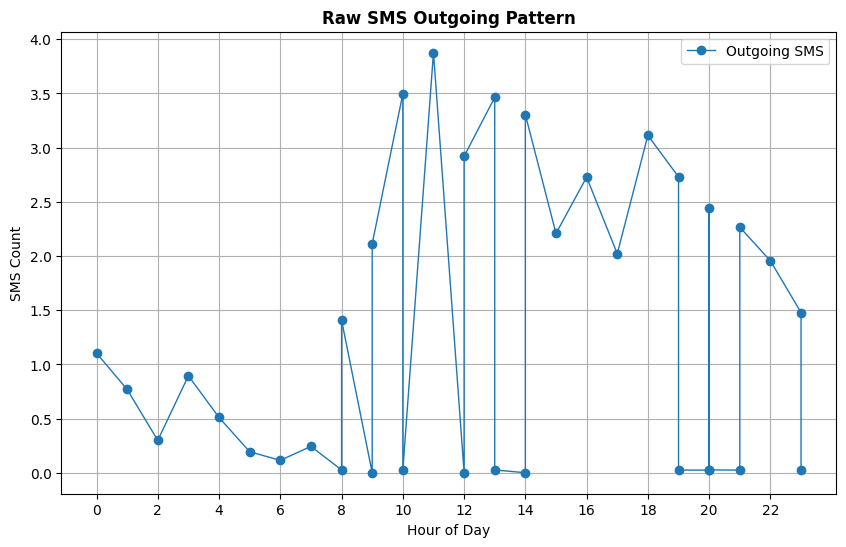

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))


# Plot 1: Raw data
plt.plot(sms_outgoing['hour'], sms_outgoing['smsout'], marker='o', linewidth=1, markersize=6, label='Outgoing SMS')
plt.title('Raw SMS Outgoing Pattern', fontweight='bold', fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('SMS Count')
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.legend();


## Hand on : Pick a different grid square and find its peak SMS hour.

#Assignment 1

##Assignment Overview

Total Points: 100

Duration: 2 weeks (Tuesday Jan 20th, 6 am  - Wednesday Feb 04rd,6am)

Deliverables:

  - Jupyter notebook (.ipynb) or Module(.py) with answers and visualizations
  - README explaining your approach(2 pages)
    - Overview of your approach
    - Key decisions you made (e.g., how you handled missing values)
    - Summary of key findings
  - All submissions should be hosted on your github account.(submit the link to the repo alongside your homework)


###TASK 1: Load and Merge data

1. Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv,
sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.

2. Create a clean, analysis-ready dataset.

####Requirements:
- Load all 3 activity files
- Add date and time columns
- Combine into single dataframe
- Handle any missing values (Hint: Fill with mean)
- Add aggregate columns (total_sms, total_calls, total_internet)

####Questions (50 points):
- How many total records across all 3 datasets? (10)
- How many unique grid squares (CellID) are there? (5)
- How many unique country codes appear in the data? (5)
- Are there any missing values?
  - If yes, input missing/NaN with the mean of each columns. (10)
  - For which columns are missing values most common? (5)
  - How many records did you modify? (5)

- What is the most common peak hour across all grids? (5)
  - What hour has the lowest activity? (5)
  - Calculate and report: mean, median, std, min, max for total calls by hour (15)

- What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)? (5)


- Do international calls happen at different times than domestic? (compare hourly patterns) (5)

- Use numpy to perform statistical comparisons between different conditions. (5)

  Compare:
    1. Domestic (Italy) vs International calls.
        - What percentage of calls are international vs domestic? (5)
        - What percentage of SMS are international vs domestic? (5)
        - Are international calls more incoming or outgoing (calculate the ratio) (5)
    2. Different activity types.
        - Is there a correlation between SMS volume and Call volume at the grid level? (5)

### 1. Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv, sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.


In [53]:
#Load 3 SMS/call/internet activity data
sms_call_internet_02_df = pd.read_csv("sms-call-internet-mi-2013-11-02.csv")
print(sms_call_internet_02_df.info())
sms_call_internet_02_df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847331 entries, 0 to 1847330
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   datetime     object 
 1   CellID       int64  
 2   countrycode  int64  
 3   smsin        float64
 4   smsout       float64
 5   callin       float64
 6   callout      float64
 7   internet     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 112.8+ MB
None


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN


In [54]:

sms_call_internet_04_df = pd.read_csv("sms-call-internet-mi-2013-11-04.csv")
print(sms_call_internet_04_df.info())
sms_call_internet_04_df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299544 entries, 0 to 2299543
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   datetime     object 
 1   CellID       int64  
 2   countrycode  int64  
 3   smsin        float64
 4   smsout       float64
 5   callin       float64
 6   callout      float64
 7   internet     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 140.4+ MB
None


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-04 00:00:00,1,0,0.1080,NaN,NaN,NaN,NaN
1,2013-11-04 00:00:00,1,39,1.0266,0.8069,0.0552,0.2155,50.342
2,2013-11-04 00:00:00,2,0,0.1093,NaN,NaN,NaN,NaN


In [55]:

sms_call_internet_06_df = pd.read_csv("sms-call-internet-mi-2013-11-06.csv")
print(sms_call_internet_06_df.info())
sms_call_internet_06_df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417156 entries, 0 to 2417155
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   datetime     object 
 1   CellID       int64  
 2   countrycode  int64  
 3   smsin        float64
 4   smsout       float64
 5   callin       float64
 6   callout      float64
 7   internet     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 147.5+ MB
None


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-06 00:00:00,1,0,0.0814,NaN,NaN,NaN,NaN
1,2013-11-06 00:00:00,1,39,0.7458,0.7204,0.1626,0.1057,52.3219
2,2013-11-06 00:00:00,2,0,0.0829,NaN,NaN,NaN,NaN


### Combine into single dataframe

In [56]:

# Combine into single dataframe
combined_df = pd.concat([sms_call_internet_02_df, sms_call_internet_04_df, sms_call_internet_06_df],ignore_index=True )
print(combined_df.info())
combined_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6564031 entries, 0 to 6564030
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   datetime     object 
 1   CellID       int64  
 2   countrycode  int64  
 3   smsin        float64
 4   smsout       float64
 5   callin       float64
 6   callout      float64
 7   internet     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 400.6+ MB
None


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933
...,...,...,...,...,...,...,...,...
6564026,2013-11-06 23:00:00,10000,32,NaN,NaN,NaN,NaN,0.0860
6564027,2013-11-06 23:00:00,10000,34,0.5160,0.4300,NaN,NaN,NaN
6564028,2013-11-06 23:00:00,10000,39,4.5423,4.8837,0.9010,0.2675,101.0942
6564029,2013-11-06 23:00:00,10000,41,NaN,NaN,0.0860,NaN,NaN


### 2. Create a clean, analysis-ready dataset.
Add date and time columns

In [57]:

# Convert datetime column from object to datetime and extract date and time into new columns
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])
combined_df['date'] = combined_df['datetime'].dt.date
combined_df['time'] = combined_df['datetime'].dt.time
combined_df.tail()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time
6564026,2013-11-06 23:00:00,10000,32,NaN,NaN,NaN,NaN,0.0860,2013-11-06,23:00:00
6564027,2013-11-06 23:00:00,10000,34,0.5160,0.4300,NaN,NaN,NaN,2013-11-06,23:00:00
6564028,2013-11-06 23:00:00,10000,39,4.5423,4.8837,0.901,0.2675,101.0942,2013-11-06,23:00:00
6564029,2013-11-06 23:00:00,10000,41,NaN,NaN,0.086,NaN,NaN,2013-11-06,23:00:00
6564030,2013-11-06 23:00:00,10000,221,NaN,NaN,NaN,0.2580,NaN,2013-11-06,23:00:00


#### How many total records across all 3 datasets? (10)

In [58]:
# Total Number of records (rows) in the combined dataset
print("Total Number of records :", combined_df.shape[0])

Total Number of records : 6564031


#### How many unique grid squares (CellID) are there? (5)

In [59]:
# Number unique grid squares (CellID)
print("Number of unique grid squares (CellID):", combined_df['CellID'].nunique())


Number of unique grid squares (CellID): 10000


#### How many unique country codes appear in the data? (5)

In [60]:

# Number unique country codes appear in the data
print("Number of unique country codes in the data:", combined_df['countrycode'].nunique())

Number of unique country codes in the data: 302



### Are there any missing values?

If yes, input missing/NaN with the mean of each columns. (10)

For which columns are missing values most common? (5)

How many records did you modify? (5)

In [67]:
combined_df.isna().sum()

,0
datetime,0
CellID,0
countrycode,0
smsin,3964171
smsout,5025738
callin,4761685
callout,3764484
internet,3621117
date,0
time,0


#### Handle any missing values (Hint: Fill with mean)

In [68]:
print('Missing values before imputation:')
print(combined_df[['smsin', 'smsout', 'callin', 'callout', 'internet']].isnull().sum())


# Impute missing values with the mean

modified_count = 0   # Keep track of modified values

for col in ['smsin', 'smsout', 'callin', 'callout', 'internet']:
    original_nans = combined_df[col].isnull().sum()
    combined_df[col] = combined_df[col].fillna(combined_df[col].mean())
    modified_count += (original_nans - combined_df[col].isnull().sum())

print(f"\nNumber of records filled: {modified_count}")

print('\nMissing values after imputation:')
print(combined_df[['smsin', 'smsout', 'callin', 'callout', 'internet']].isnull().sum())


Missing values before imputation:
smsin       3964171
smsout      5025738
callin      4761685
callout     3764484
internet    3621117
dtype: int64

Number of records filled: 21137195

Missing values after imputation:
smsin       0
smsout      0
callin      0
callout     0
internet    0
dtype: int64


* The SMSOUT column is the one with most missing values, with 5025738 missing values.

* We Modified 21137195 records.



### Add aggregate columns (total_sms, total_calls, total_internet)

In [69]:
# Add aggregate columns for total sms, total calls, and total internet activity
combined_df['total_sms'] = combined_df['smsin'] + combined_df['smsout']
combined_df['total_calls'] = combined_df['callin'] + combined_df['callout']
combined_df['total_internet'] = combined_df['internet']

combined_df.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time,total_sms,total_calls,total_internet
0,2013-11-02,1,0,0.2445,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,7.685251,13.425298,101.976153
1,2013-11-02,1,39,1.4952,1.121300,0.270800,0.300400,46.509400,2013-11-02,00:00:00,2.616500,0.571200,46.509400
2,2013-11-02,1,53,0.0018,0.003600,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0.005400,13.425298,101.976153
3,2013-11-02,2,0,0.2458,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,7.686551,13.425298,101.976153
4,2013-11-02,2,39,1.5028,1.124300,0.275100,0.302300,46.693300,2013-11-02,00:00:00,2.627100,0.577400,46.693300


### What is the most common peak hour across all grids? (5)

In [70]:
# Extract hours in the datetime column
combined_df['hour'] = combined_df['datetime'].dt.hour
print("Added 'hour' column to combined_df:")
combined_df[['datetime', 'hour']].head()

Added 'hour' column to combined_df:


,datetime,hour
0,2013-11-02,0
1,2013-11-02,0
2,2013-11-02,0
3,2013-11-02,0
4,2013-11-02,0


In [71]:
# Calculate 'total_activity_hourly' as the sum of 'total_sms', 'total_calls', and 'total_internet' for each hour
hourly_activity = combined_df.groupby('hour')[['total_sms', 'total_calls', 'total_internet']].sum().reset_index()
hourly_activity['total_activity_hourly'] = hourly_activity['total_sms'] + hourly_activity['total_calls'] + hourly_activity['total_internet']
print("Hourly activity aggregated and total activity calculated:")
hourly_activity.head()

Hourly activity aggregated and total activity calculated:


,hour,total_sms,total_calls,total_internet,total_activity_hourly
0,0,1.793529e+06,1.544151e+06,1.686987e+07,2.020755e+07
1,1,1.256787e+06,1.185631e+06,1.318190e+07,1.562431e+07
2,2,1.044790e+06,1.028140e+06,1.110928e+07,1.318221e+07
3,3,9.772733e+05,9.711108e+05,9.912125e+06,1.186051e+07
4,4,1.127516e+06,1.100273e+06,9.549219e+06,1.177701e+07


### Peak hour:

In [72]:
# Get the hour with highest activity
peak_hour = hourly_activity.loc[hourly_activity['total_activity_hourly'].idxmax()]

print(f"Peak activity hour: {int(peak_hour['hour'])} - Total activity: {peak_hour['total_activity_hourly']:.2f} ")


Peak activity hour: 17 - Total activity: 51477440.53 


### What hour has the lowest activity? (5)

In [73]:

# Get the hour with lowest activity
lowest_hour = hourly_activity.loc[hourly_activity['total_activity_hourly'].idxmin()]

print(f"Lowest activity hour: {int(lowest_hour['hour'])}  - Total activity: {lowest_hour['total_activity_hourly']:.2f} ")

Lowest activity hour: 4  - Total activity: 11777007.39 


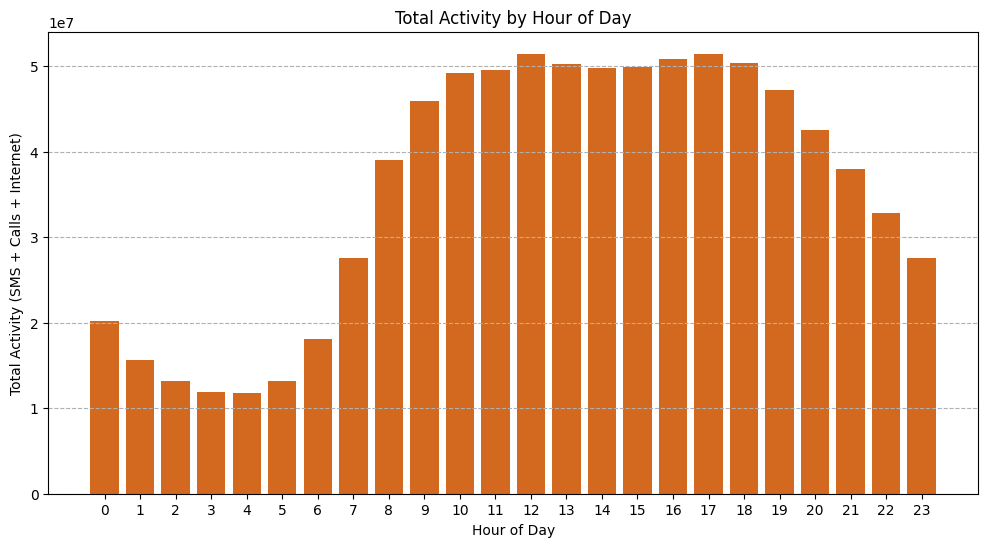

In [75]:
# Plot the Total Activities per hour
plt.figure(figsize=(12, 6))
plt.bar(hourly_activity['hour'], hourly_activity['total_activity_hourly'], color='chocolate')
plt.xlabel('Hour of Day')
plt.ylabel('Total Activity (SMS + Calls + Internet)')
plt.title('Total Activity by Hour of Day')
plt.xticks(hourly_activity['hour'])
plt.grid(axis='y', linestyle='--')
plt.show()

### Calculate and report: mean, median, std, min, max for total calls by hour (15)

In [76]:

print("\nDescriptive statistics for total calls by hour:")
calls_by_hour_stats_per_hour = combined_df.groupby('hour')['total_calls'].agg(['mean', 'median', 'std', 'min', 'max'])
calls_by_hour_stats_per_hour


Descriptive statistics for total calls by hour:


,mean,median,std,min,max
hour,,,,,
0,10.280157,13.425298,5.279040,0.0002,223.4941
1,9.928661,13.425298,5.129893,0.0000,141.9847
2,9.894713,13.425298,5.329786,0.0000,210.9691
3,9.953373,13.425298,5.649571,0.0000,298.3541
4,10.235666,13.425298,5.294288,0.0000,255.0555
5,10.029019,13.425298,5.395003,0.0000,177.1690
6,10.339697,13.425298,4.969421,0.0002,201.3488
7,11.464472,13.425298,8.435423,0.0000,412.7314
8,13.272816,13.425298,22.237365,0.0000,1122.7091


### What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)? (5)

In [77]:
# Categorize each hour into 'daytime' (6 AM inclusive to 8 PM exclusive) or 'nighttime' (8 PM inclusive to 6 AM exclusive).
hourly_activity['time_period'] = hourly_activity['hour'].apply(lambda x: 'daytime' if 6 <= x < 20 else 'nighttime')
print("Hourly activity with 'time_period' column:")
hourly_activity.head()

Hourly activity with 'time_period' column:


,hour,total_sms,total_calls,total_internet,total_activity_hourly,time_period
0,0,1.793529e+06,1.544151e+06,1.686987e+07,2.020755e+07,nighttime
1,1,1.256787e+06,1.185631e+06,1.318190e+07,1.562431e+07,nighttime
2,2,1.044790e+06,1.028140e+06,1.110928e+07,1.318221e+07,nighttime
3,3,9.772733e+05,9.711108e+05,9.912125e+06,1.186051e+07,nighttime
4,4,1.127516e+06,1.100273e+06,9.549219e+06,1.177701e+07,nighttime


In [78]:
# Calculate the total 'total_activity_hourly' for each time period
time_period_activity = hourly_activity.groupby('time_period')['total_activity_hourly'].sum().reset_index()
print("Total activity by time period:")
time_period_activity

Total activity by time period:


,time_period,total_activity_hourly
0,daytime,6.310280e+08
1,nighttime,2.269183e+08


In [79]:
# Compute the percentage of total activity
overall_total_activity = time_period_activity['total_activity_hourly'].sum()
print(f"Overall total activity: {overall_total_activity:.2f}")

Overall total activity: 857946276.41


In [80]:
#  Compute the percentage of total activity  for daytime and nighttime period
time_period_activity['percentage_of_total_activity'] = (time_period_activity['total_activity_hourly'] / overall_total_activity) * 100
print("Time period activity with percentages:")
time_period_activity

Time period activity with percentages:


,time_period,total_activity_hourly,percentage_of_total_activity
0,daytime,6.310280e+08,73.550987
1,nighttime,2.269183e+08,26.449013


* 73.6% traffic happen during daytime
* 26.4% traffic happen durin nighttime

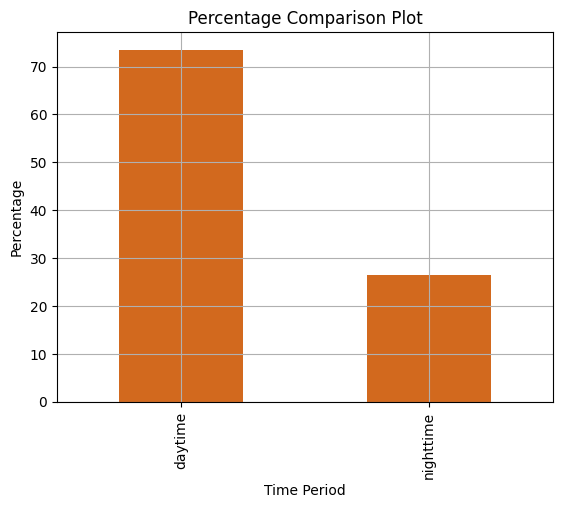

In [81]:
time_period_activity_df = time_period_activity.set_index('time_period')

time_period_activity_df['percentage_of_total_activity'].plot(kind='bar',  legend=False, color='chocolate')
plt.title('Percentage Comparison Plot')
plt.xlabel('Time Period')
plt.ylabel('Percentage')
plt.grid()
plt.show()



### Do international calls happen at different times than domestic? (compare hourly patterns) (5)

* Use numpy to perform statistical comparisons between different conditions. (5)

* Compare:

1. Domestic (Italy) vs International calls.

In [82]:

# Create 'call_type' column
combined_df['call_type'] = np.where(combined_df['countrycode'] == 39, 'Domestic', 'International')

# Create 'sms_type' column
combined_df['sms_type'] = np.where(combined_df['countrycode'] == 39, 'Domestic', 'International')

print("Added 'call_type' and 'sms_type' columns to combined_df:")
combined_df[['countrycode', 'call_type', 'sms_type']].head()

Added 'call_type' and 'sms_type' columns to combined_df:


,countrycode,call_type,sms_type
0,0,International,International
1,39,Domestic,Domestic
2,53,International,International
3,0,International,International
4,39,Domestic,Domestic


In [83]:
# Extract hourly data
hourly_calls = combined_df.groupby(['hour', 'call_type'])['total_calls'].sum().reset_index()
print("Hourly call volume grouped by call type:")
hourly_calls.head()

Hourly call volume grouped by call type:


,hour,call_type,total_calls
0,0,Domestic,1.400787e+05
1,0,International,1.404073e+06
2,1,Domestic,9.761930e+04
3,1,International,1.088012e+06
4,2,Domestic,1.161369e+05


In [84]:
hourly_calls[hourly_calls['call_type'] == 'Domestic']['total_calls']

,total_calls
0,1.400787e+05
2,9.761930e+04
4,1.161369e+05
6,1.307244e+05
8,1.293069e+05
10,9.228045e+04
12,1.175235e+05
14,4.414562e+05
16,1.222819e+06
18,1.960100e+06


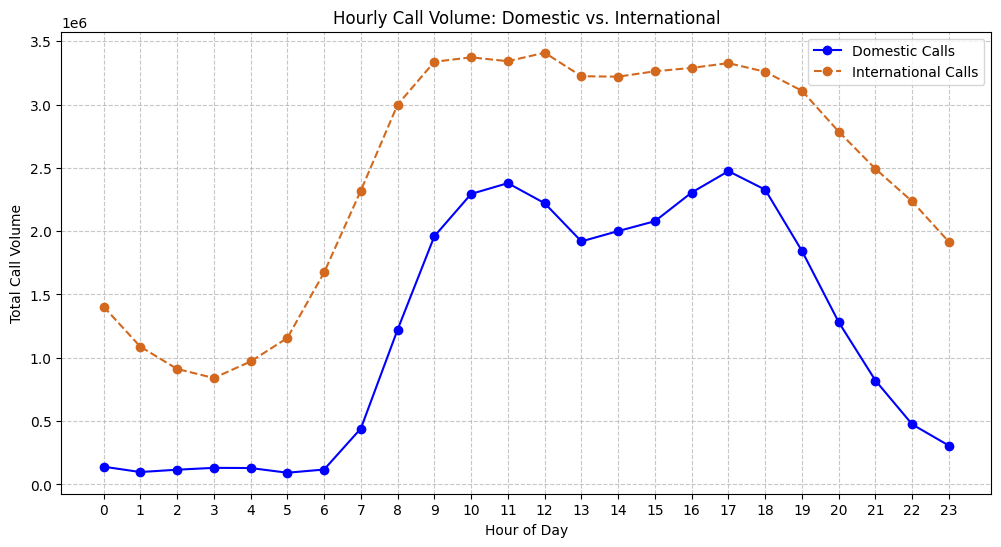

In [86]:
# plot to visualize hourly pattern

plt.figure(figsize=(12, 6))

# Plot Domestic calls
plt.plot(hourly_calls[hourly_calls['call_type'] == 'Domestic']['hour'],
         hourly_calls[hourly_calls['call_type'] == 'Domestic']['total_calls'],
         label='Domestic Calls', marker='o', linestyle='-', color='blue')

# Plot International calls
plt.plot(hourly_calls[hourly_calls['call_type'] == 'International']['hour'],
         hourly_calls[hourly_calls['call_type'] == 'International']['total_calls'],
         label='International Calls', marker='o', linestyle='--', color='chocolate')

plt.title('Hourly Call Volume: Domestic vs. International')
plt.xlabel('Hour of Day')
plt.ylabel('Total Call Volume')
plt.xticks(range(0, 24)) # Ensure all hours are displayed
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.show()

In [87]:
#Calculate the percentage of total calls that are domestic vs international.
call_type_totals = combined_df.groupby('call_type')['total_calls'].sum().reset_index()
print("Total call volume by call type:")
call_type_totals

Total call volume by call type:


,call_type,total_calls
0,Domestic,2.917423e+07
1,International,5.894984e+07


#### What percentage of calls are international vs domestic? (5)

In [88]:
# Calculate total percentage of calls for both domestic and international categories
overall_total_calls = call_type_totals['total_calls'].sum()
call_type_totals['percentage'] = (call_type_totals['total_calls'] / overall_total_calls) * 100

print("Percentage of total calls by call type:")
call_type_totals

Percentage of total calls by call type:


,call_type,total_calls,percentage
0,Domestic,2.917423e+07,33.105858
1,International,5.894984e+07,66.894142


* Percentage of Domestic Calls: 33.1%
* Percentage of International Calls: 66.9%

### What percentage of SMS are international vs domestic? (5)

In [89]:
# Calculate  total SMS grouped by SMS type (domestic and international)
sms_type_totals = combined_df.groupby('sms_type')['total_sms'].sum().reset_index()
print("Total SMS volume by SMS type:")
sms_type_totals

Total SMS volume by SMS type:


,sms_type,total_sms
0,Domestic,2.509296e+07
1,International,7.535462e+07


In [90]:
# # Calculate percentage of SMS that are domestic vs international

overall_total_sms = sms_type_totals['total_sms'].sum()

sms_type_totals['percentage'] = (sms_type_totals['total_sms'] / overall_total_sms) * 100

print("Percentage of total SMS by SMS type:")
sms_type_totals

Percentage of total SMS by SMS type:


,sms_type,total_sms,percentage
0,Domestic,2.509296e+07,24.981145
1,International,7.535462e+07,75.018855


* Percentage of Domestic SMS: 25%
* Percentage of International SMS: 75%

### Are international calls more incoming or outgoing (calculate the ratio) (5)

In [91]:
# Filter International calls and determine if international calls are more incoming or outgoing
international_calls = combined_df[combined_df['call_type'] == 'International']

total_international_callin = international_calls['callin'].sum()
total_international_callout = international_calls['callout'].sum()

print(f"Total International Incoming Calls: {total_international_callin:.2f}")
print(f"Total International Outgoing Calls: {total_international_callout:.2f}")

if total_international_callout > 0:
    ratio_incoming_to_outgoing = total_international_callin / total_international_callout
    print(f"Ratio of International Incoming to Outgoing Calls: {ratio_incoming_to_outgoing:.2f}")
else:
    print("No international outgoing calls to calculate a ratio.")

Total International Incoming Calls: 36911800.81
Total International Outgoing Calls: 22038040.62
Ratio of International Incoming to Outgoing Calls: 1.67


2. Different activity types.
###   - Is there a correlation between SMS volume and Call volume at the grid level? (5)

In [92]:
#  calculate the correlation between aggregated 'total_sms' and 'total_calls' columns
cell_activity = combined_df.groupby('CellID')[['total_sms', 'total_calls']].sum().reset_index()

correlation = cell_activity['total_sms'].corr(cell_activity['total_calls'])

print(f"Correlation between SMS volume and Call volume at the grid level: {correlation:.2f}")

Correlation between SMS volume and Call volume at the grid level: 0.99


In [93]:
# Calculate the correlation matrix for 'total_sms' and 'total_calls'
correlation_matrix = cell_activity[['total_sms', 'total_calls']].corr()

print("Correlation matrix:")
correlation_matrix

Correlation matrix:


,total_sms,total_calls
total_sms,1.000000,0.986235
total_calls,0.986235,1.000000


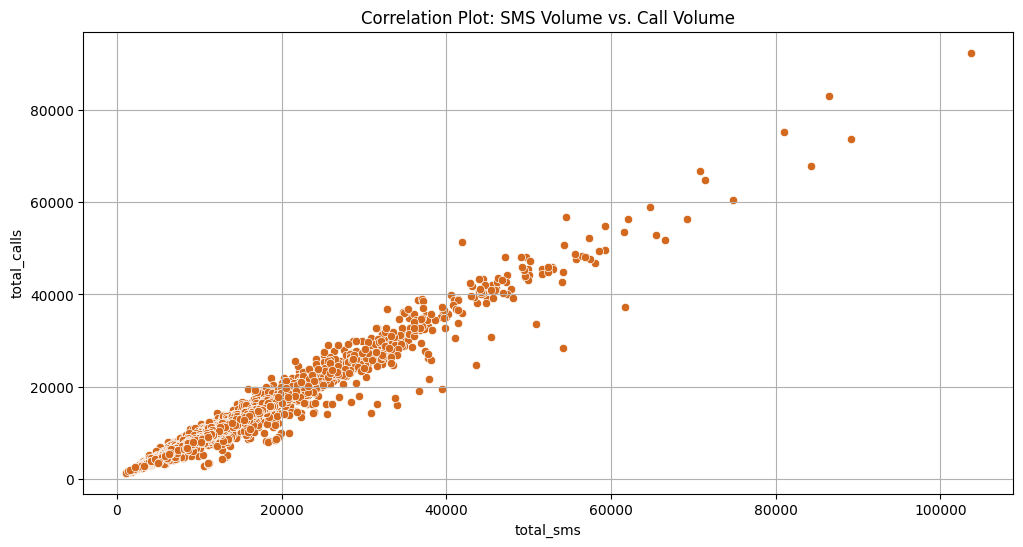

In [94]:
#Plot Correlation between SMS and CALLS
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cell_activity, x='total_sms', y='total_calls', color='chocolate')
plt.title('Correlation Plot: SMS Volume vs. Call Volume')
plt.grid()
plt.show()

There is a high correclation between SMS and calls at grid level. This is showned by the correlation value and proved by the plot